<a href="https://colab.research.google.com/github/HossamSaoud/MachineLearning_Notebooks/blob/main/Neural_Netowrks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn import preprocessing
import seaborn as sns
from matplotlib import rcParams

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(f'\nAfter reshaping:\nX_train:{x_train.shape}\nX_test:{x_test.shape}')


After reshaping:
X_train:(60000, 784)
X_test:(10000, 784)


In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
ohe=preprocessing.OneHotEncoder()
ohe.fit(y_train)
transformed_ytrain=ohe.transform(y_train).toarray()
ohe.fit(y_test)
transformed_ytest=ohe.transform(y_test).toarray()

In [ ]:
model=Sequential()
model.add(Dense(32,input_shape=(784,),name="input_layer"))
model.add(Dense(32,activation="relu",name="layer1"))
model.add(Dense(32,activation="relu",name="layer2"))
model.add(Dense(32,activation="relu",name="layer3"))
model.add(Dense(32,activation="relu",name="layer4"))
model.add(Dense(10,activation="softmax",name="Output_layer"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 32)                25120     
                                                                 
 layer1 (Dense)              (None, 32)                1056      
                                                                 
 layer2 (Dense)              (None, 32)                1056      
                                                                 
 layer3 (Dense)              (None, 32)                1056      
                                                                 
 layer4 (Dense)              (None, 32)                1056      
                                                                 
 Output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 29,674
Trainable params: 29,674
Non-trai

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
epochs=[5,10,15,20]
batch=[64,45,80,100,32]

In [ ]:
for i in range(len(batch)):
  for j in range(len(epochs)):
    model.fit(x_train,transformed_ytrain,batch_size=batch[i],epochs=epochs[j],verbose=0)
    y_pred=model.predict(x_test)
    y_pred =np.array([np.argmax(x) for x in y_pred])
    print(f'for epochs={epochs[j]} and batch size ={batch[i]}')
    Precision,Recall,F1_score,_ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    Accuracy = accuracy_score(y_test, y_pred)
    print(f'Precision: {Precision}\nRecall: {Recall}\nF1_score: {F1_score}\nAccuracy: {Accuracy}')

313/313 [==============================] - 1s 2ms/step
for epochs=5 and batch size =64
Precision: 0.9389808501562582
Recall: 0.9387185061318741
F1_score: 0.938341540963125
Accuracy: 0.9393
313/313 [==============================] - 1s 2ms/step
for epochs=10 and batch size =64
Precision: 0.9580520255755495
Recall: 0.9580625441190798
F1_score: 0.957971943883634
Accuracy: 0.9585
313/313 [==============================] - 1s 2ms/step
for epochs=15 and batch size =64
Precision: 0.9631158642337093
Recall: 0.9629139726699014
F1_score: 0.962896604616815
Accuracy: 0.9632
313/313 [==============================] - 1s 2ms/step
for epochs=20 and batch size =64
Precision: 0.9635262413844407
Recall: 0.963242841305888
F1_score: 0.9632278957996958
Accuracy: 0.9636
313/313 [==============================] - 1s 2ms/step
for epochs=5 and batch size =45
Precision: 0.9598844022410139
Recall: 0.9585009373349062
F1_score: 0.9587850206168422
Accuracy: 0.9593
313/313 [==============================] - 1s 2ms/s

[[ 974    0    0    0    0    1    3    1    1    0]
 [   2 1120    1    2    0    2    2    2    4    0]
 [   9    2  996    3    3    3    3    6    5    2]
 [   1    0    5  961    2   26    0    7    5    3]
 [   3    2    2    0  950    0    7    5    0   13]
 [   4    0    0   10    0  859    8    1    8    2]
 [  13    3    2    0    4    5  930    0    1    0]
 [   4    3   14    4    1    2    0  993    1    6]
 [   7    3    2   11    3    7    4    7  926    4]
 [   8    5    0    8   18    2    2   10    4  952]]


<Axes: >

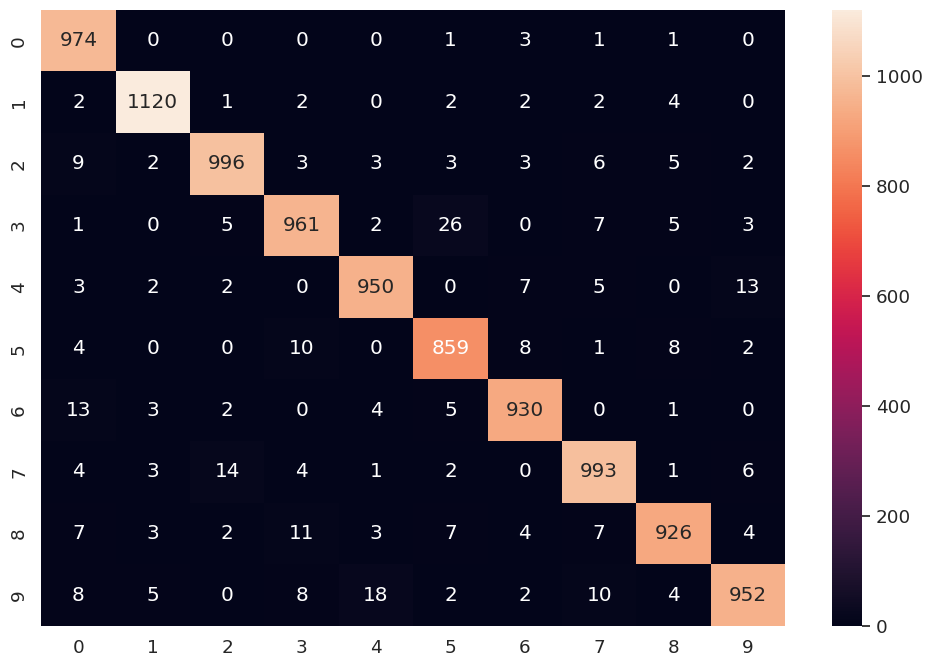

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 1.2)
sns.heatmap(cm, fmt='d', annot=True, xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9'])

# We can get higher accuracy if we use Convolutional neural networks so lets try it:

In [56]:
from tensorflow.keras import models, layers
from tensorflow.keras import Model, Input

In [57]:
model=models.Sequential()
model.add(layers.Conv2D(filters=8,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120,activation='relu'))
model.add(layers.Dense(units=120,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

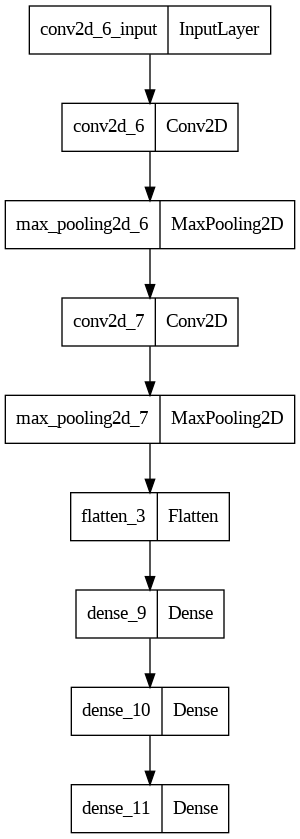

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [60]:
from keras.datasets import mnist

In [61]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [62]:
train_images.shape

(60000, 28, 28)

In [63]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

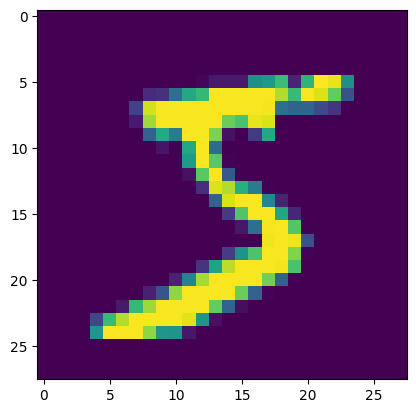

In [64]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(train_images[0], (28,28)))



In [65]:
#add padding so we can get the original input dimensions of the picture without any reduction to it
train_images = np.pad(train_images, ((0,0),(2,2),(2, 2)), 'constant') 
test_images = np.pad(test_images, ((0,0),(2,2),(2, 2)), 'constant')

In [66]:
from tensorflow.keras.utils import to_categorical
#add new axis so we can fit the images into our model which requires 4D (samples, length, width, channels)
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
#convert all the labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [67]:
train_images.shape

(60000, 32, 32, 1)

In [68]:
train_labels.shape

(60000, 10)

In [72]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 5s 5ms/step - loss: 0.0348 - accuracy: 0.9895
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0226 - accuracy: 0.9922
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9915
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0154 - accuracy: 0.9954
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0143 - accuracy: 0.9956

In [73]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0605 - accuracy: 0.9886


gives us a 98.8% accuracy almost 99% which is an improvement to the accuracy we previously had with dense layers(96%)

In [74]:
print('test_accuracy:', test_acc)

test_accuracy: 0.9886000156402588


In [75]:
print('test_loss:', test_loss)

test_loss: 0.060465745627880096
